In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import trim_mean
from numpy import mean, absolute
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Conjunto de Datos y analisis descriptivo

In [2]:
# R
%load_ext rpy2.ipython

In [3]:
%%R
url <-'https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/dataset/Weather%20Training%20Data.csv'
weather <- read.csv('https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/dataset/Weather%20Training%20Data.csv')

In [4]:
url = 'https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/dataset/Weather%20Training%20Data.csv'
weather = pd.read_csv(url)
weather.head(8)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1


In [5]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [6]:
weather.describe

<bound method NDFrame.describe of           row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0           Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1           Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2           Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3           Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4           Row4   Albury      7.7     26.7       0.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
99511  Row101816    Uluru      8.0     20.7       0.0          NaN       NaN   
99512  Row101817    Uluru      3.5     21.8       0.0          NaN       NaN   
99513  Row101818    Uluru      2.8     23.4       0.0          NaN       NaN   
99514  Row101819    Uluru      3.6     25.3       0.0          NaN       NaN   
99515  Row101820    Uluru      5.4     26.9       0.0          NaN       NaN   

     

In [7]:
attr_cont =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
            'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RainTomorrow']
attr_cat = [ 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [8]:
for attr in attr_cont:
  print(attr)
  print(str(np.min(weather[attr])) + ', ' + str(np.max(weather[attr])))

MinTemp
-8.5, 33.9
MaxTemp
-4.1, 48.1
Rainfall
0.0, 371.0
Evaporation
0.0, 86.2
Sunshine
0.0, 14.5
WindGustSpeed
6.0, 135.0
WindSpeed9am
0.0, 130.0
WindSpeed3pm
0.0, 87.0
Humidity9am
0.0, 100.0
Humidity3pm
0.0, 100.0
Pressure9am
980.5, 1041.0
Pressure3pm
978.2, 1039.6
Cloud9am
0.0, 9.0
Cloud3pm
0.0, 9.0
Temp9am
-7.0, 40.2
Temp3pm
-5.1, 46.7
RainTomorrow
0, 1


In [9]:
np.unique(weather['Location'])

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [10]:
weather.mean(axis = 0) 

<ipython-input-10-41d106b64972>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.mean(axis = 0)


MinTemp            12.176266
MaxTemp            23.218513
Rainfall            2.353024
Evaporation         5.461320
Sunshine            7.615090
WindGustSpeed      39.976966
WindSpeed9am       14.004849
WindSpeed3pm       18.650464
Humidity9am        68.866376
Humidity3pm        51.433296
Pressure9am      1017.684638
Pressure3pm      1015.286204
Cloud9am            4.447985
Cloud3pm            4.519122
Temp9am            16.970041
Temp3pm            21.681340
RainTomorrow        0.224677
dtype: float64

In [11]:
weather.median(axis = 0) 

<ipython-input-11-c686147c875a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.median(axis = 0)


MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.4
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.7
Pressure3pm      1015.3
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RainTomorrow        0.0
dtype: float64

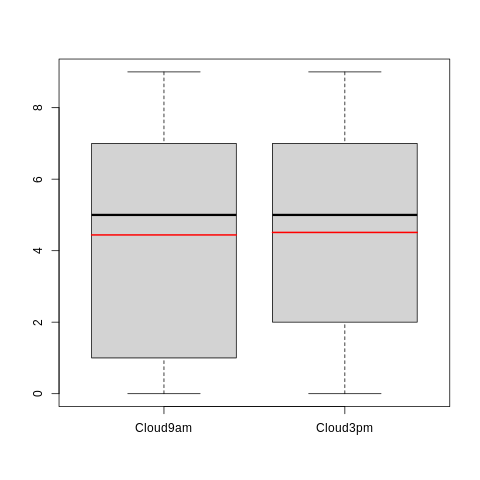

In [12]:
%%R
#boxplot
boxplot(weather$Cloud9am, weather$Cloud3pm, names=c('Cloud9am', 'Cloud3pm'))
segments(x0 = 0.6, y0 = 4.44,
         x1 = 1.4, y1 = 4.44,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 4.51,
         x1 = 2.4, y1 = 4.51,
        col = "red", lwd = 2)

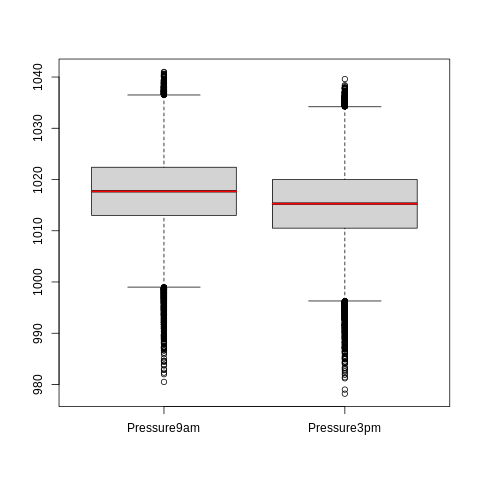

In [13]:
%%R
#boxplot
boxplot(weather$Pressure9am, weather$Pressure3pm, names=c('Pressure9am', 'Pressure3pm'))
segments(x0 = 0.6, y0 = 1017.68,
         x1 = 1.4, y1 = 1017.68,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 1015.28,
         x1 = 2.4, y1 = 1015.28,
        col = "red", lwd = 2)

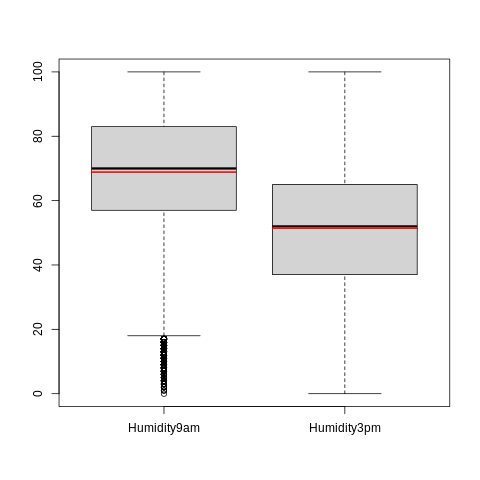

In [14]:
%%R
#boxplot
boxplot(weather$Humidity9am, weather$Humidity3pm, names=c('Humidity9am', 'Humidity3pm'))
segments(x0 = 0.6, y0 = 68.86,
         x1 = 1.4, y1 = 68.86,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 51.43,
         x1 = 2.4, y1 = 51.43,
        col = "red", lwd = 2)

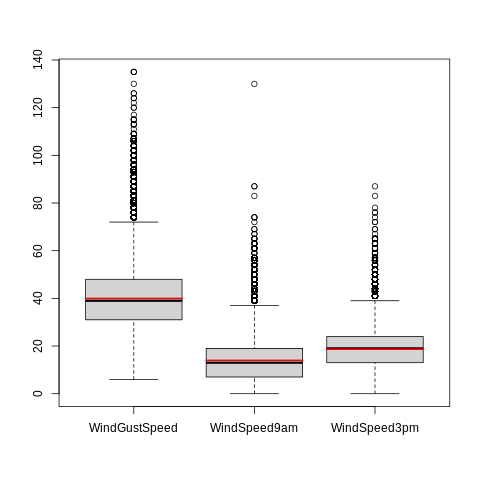

In [15]:
%%R
#boxplot
boxplot(weather$WindGustSpeed, weather$WindSpeed9am, weather$WindSpeed3pm, names=c('WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'))
segments(x0 = 0.6, y0 = 39.976,
         x1 = 1.4, y1 = 39.976,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 14.00,
         x1 = 2.4, y1 = 14.00,
        col = "red", lwd = 2)
segments(x0 = 2.6, y0 = 18.65,
         x1 = 3.4, y1 = 18.65,
        col = "red", lwd = 2)

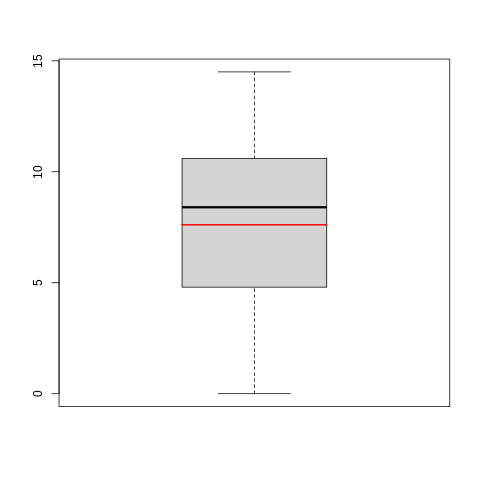

In [16]:
%%R
#boxplot
boxplot(weather$Sunshine, names=c('Sunshine'))
segments(x0 = 0.8, y0 = 7.61,
      x1 = 1.2, y1 = 7.61,
  col = "red", lwd = 2)


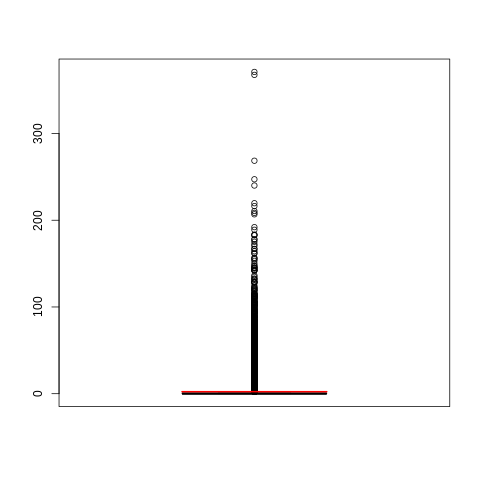

In [17]:
%%R
#boxplot
boxplot(weather$Rainfall, names=c('Rainfall'))
segments(x0 = 0.8, y0 = 2.35,
      x1 = 1.2, y1 = 2.35,
  col = "red", lwd = 2)


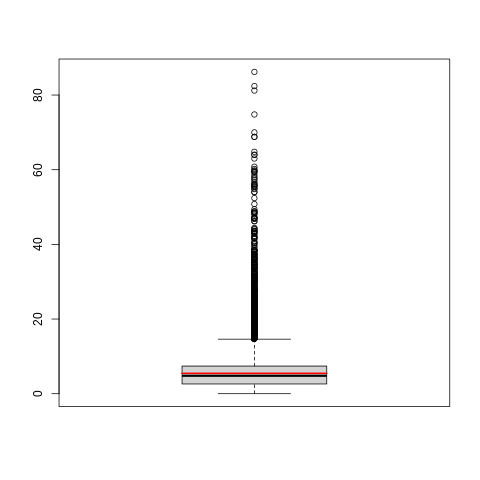

In [18]:
%%R
#boxplot
boxplot(weather$Evaporation, names=c('Evaporation'))
segments(x0 = 0.8, y0 = 5.46,
      x1 = 1.2, y1 = 5.46,
  col = "red", lwd = 2)

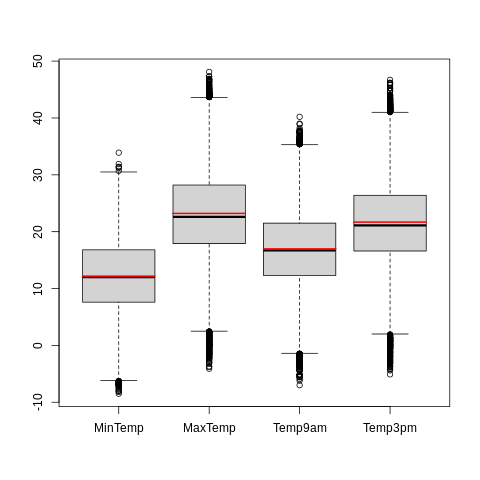

In [19]:
%%R
#boxplot
boxplot(weather$MinTemp, weather$MaxTemp, weather$Temp9am, weather$Temp3pm, names=c('MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'))
segments(x0 = 0.6, y0 = 12.17,
         x1 = 1.4, y1 = 12.17,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 23.21,
         x1 = 2.4, y1 = 23.21,
        col = "red", lwd = 2)
segments(x0 = 2.6, y0 = 16.97,
         x1 = 3.4, y1 = 16.97,
        col = "red", lwd = 2)
segments(x0 = 3.6, y0 = 21.68,
         x1 = 4.4, y1 = 21.68,
        col = "red", lwd = 2)

In [20]:
weather.cov()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,40.843376,33.488552,5.640261,12.585653,1.785577,15.689379,10.121122,9.807046,-28.822105,0.581958,-20.385834,-20.660841,1.352234,0.310679,37.359616,31.348208,0.225371
MaxTemp,33.488552,50.624255,-4.470651,17.512030,12.318712,6.977176,1.143536,3.187617,-68.518712,-74.906725,-16.619081,-21.106056,-5.948445,-5.347877,40.790338,48.283632,-0.474026
Rainfall,5.640261,-4.470651,72.043865,-1.823210,-7.603737,15.288255,6.640317,4.550123,35.908538,44.603792,-10.094187,-7.525253,5.263545,4.255359,0.648897,-4.634141,0.841889
Evaporation,12.585653,17.512030,-1.823210,17.326327,5.079167,11.545281,7.014464,4.526855,-39.909971,-33.579978,-8.086146,-8.746139,-2.198895,-1.984557,15.038275,16.639419,-0.198931
Sunshine,1.785577,12.318712,-7.603737,5.079167,14.311147,-1.428984,0.385411,1.811396,-34.925209,-48.164561,1.006272,-0.581251,-7.145780,-7.032409,7.119548,12.572063,-0.712150
WindGustSpeed,15.689379,6.977176,15.288255,11.545281,-1.428984,184.457781,72.219261,80.860619,-57.266688,-8.079437,-43.990958,-39.347139,2.658196,3.926667,13.658726,3.412670,1.321666
WindSpeed9am,10.121122,1.143536,6.640317,7.014464,0.385411,72.219261,79.251346,40.376572,-46.596028,-5.870756,-14.395499,-10.988690,0.591753,1.280453,7.639265,0.475347,0.338798
WindSpeed3pm,9.807046,3.187617,4.550123,4.526855,1.811396,80.860619,40.376572,77.472162,-24.584651,2.849884,-18.289374,-15.623335,1.402026,0.651345,9.315282,1.716704,0.326011
Humidity9am,-28.822105,-68.518712,35.908538,-39.909971,-34.925209,-57.266688,-46.596028,-24.584651,363.853769,264.023037,19.247359,25.378026,24.517703,18.139006,-58.768740,-66.187730,2.034891
Humidity3pm,0.581958,-74.906725,44.603792,-33.579978,-48.164561,-8.079437,-5.870756,2.849884,264.023037,431.709335,-3.563701,7.867994,30.667927,29.316436,-29.864326,-80.372740,3.852779


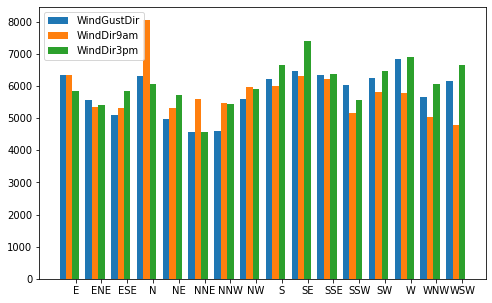

In [21]:
w=-0.5
x=np.arange(16)
plt.rcParams["figure.figsize"] = (8,5)
a = weather.groupby('WindDir3pm').size().keys()
for attr in attr_cat:
  plt.bar(x+w,weather.groupby(attr).size(),width=0.25)
  w+=0.25
plt.xticks(x, a)
plt.legend(attr_cat)



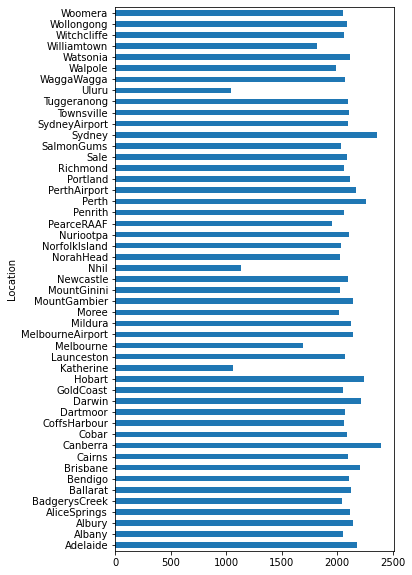

In [22]:
location = weather.groupby('Location').size()
plt.rcParams["figure.figsize"] = (5,10)
location.plot.barh()


# Preprocesamiento
## Numero de datos faltantes

In [23]:
weather = weather.replace('?',np.NaN)

print('Number of instances = %d' % (weather.shape[0]))
print('Number of attributes = %d' % (weather.shape[1]))

print('Number of missing values:')
for col in weather.columns:
    print('\t%s: %d' % (col,weather[col].isna().sum()))

Number of instances = 99516
Number of attributes = 23
Number of missing values:
	row ID: 0
	Location: 0
	MinTemp: 443
	MaxTemp: 230
	Rainfall: 979
	Evaporation: 42531
	Sunshine: 47317
	WindGustDir: 6521
	WindGustSpeed: 6480
	WindDir9am: 7006
	WindDir3pm: 2648
	WindSpeed9am: 935
	WindSpeed3pm: 1835
	Humidity9am: 1233
	Humidity3pm: 2506
	Pressure9am: 9748
	Pressure3pm: 9736
	Cloud9am: 37572
	Cloud3pm: 40002
	Temp9am: 614
	Temp3pm: 1904
	RainToday: 979
	RainTomorrow: 0


In [24]:
weather2 = weather.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
weather2

,row ID,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,ESE,41.0,SE,E,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0


In [25]:
numerica= weather2.drop(['row ID','Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow'],axis=1)
categorica=weather2.drop(['row ID','MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1)

In [26]:
numerica = numerica.fillna(numerica.mean())
categorica = categorica.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [27]:
weather2  = pd.concat([numerica, categorica], axis=1)
weather2

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,Albury,W,W,WNW,No,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,Albury,WNW,NNW,WSW,No,0
2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,Albury,W,ENE,NW,No,0
3,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,Albury,WNW,W,W,No,0
4,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,Albury,W,SSE,W,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,8.0,20.7,0.0,41.0,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,Uluru,ESE,SE,E,No,0
99512,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,Uluru,E,ESE,E,No,0
99513,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,Uluru,E,SE,ENE,No,0
99514,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,Uluru,NNW,SE,N,No,0


In [28]:
for col in weather2.columns:
    print('\t%s: %d' % (col,weather2[col].isna().sum()))

	MinTemp: 0
	MaxTemp: 0
	Rainfall: 0
	WindGustSpeed: 0
	WindSpeed9am: 0
	WindSpeed3pm: 0
	Humidity9am: 0
	Humidity3pm: 0
	Pressure9am: 0
	Pressure3pm: 0
	Temp9am: 0
	Temp3pm: 0
	Location: 0
	WindGustDir: 0
	WindDir9am: 0
	WindDir3pm: 0
	RainToday: 0
	RainTomorrow: 0


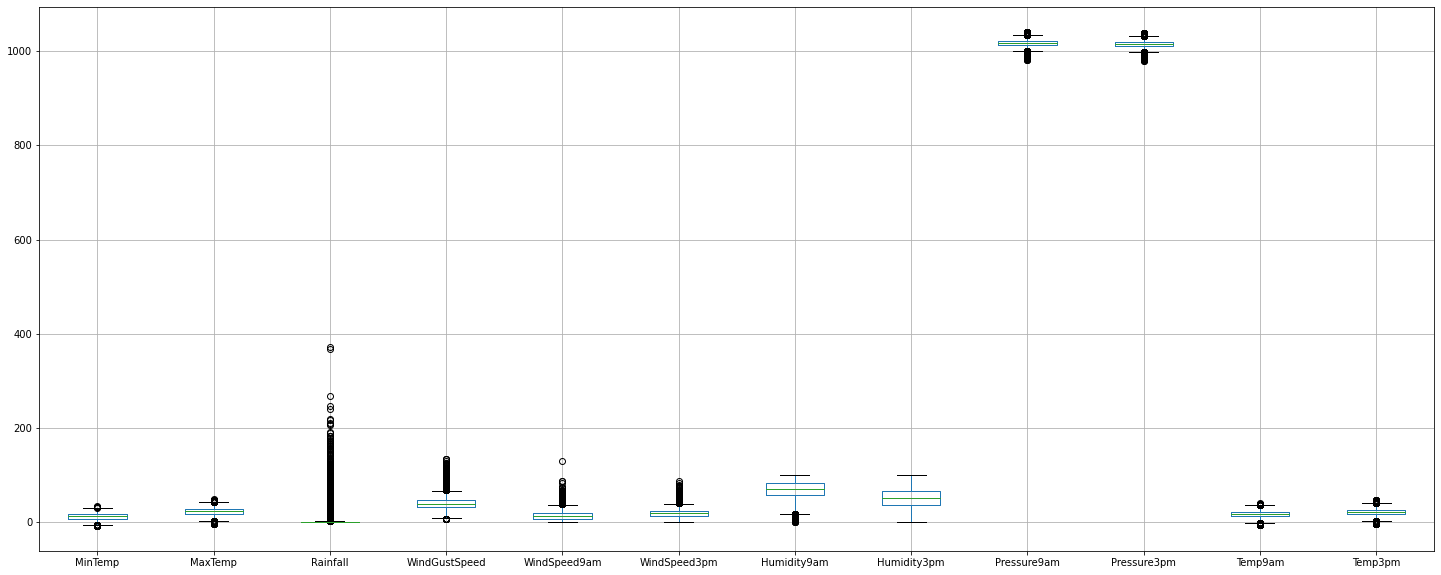

In [29]:
weatherOut = weather2.drop(['RainTomorrow'],axis=1)
numerica.boxplot(figsize=(25,10))
numerica2=weather2

In [30]:
Z = (numerica-numerica.mean())/numerica.std()
Z

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.191909,-0.044818,-0.207556,0.306356,0.676623,0.613458,0.112554,-1.434767,-1.478558,-1.223339,-0.010827,0.017285
1,-0.749025,0.264743,-0.278596,0.306356,-1.129164,0.384108,-1.311766,-1.288528,-1.049117,-1.118732,0.035548,0.381448
2,0.834881,1.277851,-0.160197,0.077905,-0.790579,0.154758,0.692833,-0.898557,-1.019500,-1.387722,0.128300,1.168041
3,0.380096,0.912006,-0.254916,1.220162,0.563761,0.613458,-0.731487,-1.386021,-1.256433,-1.477386,0.561139,1.051509
4,-0.701979,0.489878,-0.278596,-0.378998,-0.903441,-0.189267,-1.100755,-1.581006,-0.634483,-0.775022,-0.103579,0.556246
...,...,...,...,...,...,...,...,...,...,...,...,...
99511,-0.654932,-0.354378,-0.278596,0.077905,0.563761,0.842808,-0.678735,-0.947303,1.542341,1.347014,-0.830131,-0.244913
99512,-1.360633,-0.199598,-0.278596,-0.683600,0.112314,-0.647967,-0.520477,-1.191035,1.038858,0.883752,-1.170219,-0.113814
99513,-1.470408,0.025537,-0.278596,-0.683600,-0.113409,-0.877317,-0.942498,-1.337274,1.024050,0.749257,-1.062009,0.104684
99514,-1.344950,0.292885,-0.278596,-1.368954,-0.113409,-1.106667,-0.678735,-1.483514,0.861158,0.569930,-0.938340,0.410581


In [31]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

colz = ['MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
Z2 = Z
for col in colz:
  Z2 = Z2.loc[(Z2[col] > -3) & (Z2[col] <= 3),:]

print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 99516
Number of rows after discarding missing values = 96225


In [32]:
weather2_norm = pd.concat([Z2, categorica.loc[Z2.index]], axis=1)
weather2 = pd.concat([numerica.loc[Z2.index], categorica.loc[Z2.index]], axis=1)


In [33]:
weather2

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,Albury,W,W,WNW,No,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,Albury,WNW,NNW,WSW,No,0
2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,Albury,W,ENE,NW,No,0
3,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,Albury,WNW,W,W,No,0
4,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,Albury,W,SSE,W,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,8.0,20.7,0.0,41.0,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,Uluru,ESE,SE,E,No,0
99512,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,Uluru,E,ESE,E,No,0
99513,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,Uluru,E,SE,ENE,No,0
99514,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,Uluru,NNW,SE,N,No,0


In [34]:
dups = weather2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 31


In [35]:
weather2.drop_duplicates(keep=False, inplace=True)

In [36]:
continuas = [['MinTemp', 10], ['MaxTemp', 10], ['WindGustSpeed', 10], ['WindSpeed9am', 10], ['WindSpeed3pm', 10],
             ['Humidity9am', 10], ['Humidity3pm', 10], ['Pressure9am', 10], ['Pressure3pm', 10], ['Temp9am', 10],
             ['Temp3pm', 10]]

numerica_dis = numerica

for var in continuas:
  var_dis = KBinsDiscretizer(n_bins=var[1],encode='ordinal',strategy='quantile')
  numerica_dis[[var[0]]]=var_dis.fit_transform(numerica_dis[[var[0]]])
  print(var[0], var_dis.bin_edges_[0])

MinTemp [-8.5  4.   6.6  8.6 10.3 12.  13.7 15.7 18.  20.8 33.9]
MaxTemp [-4.1 14.5 16.9 18.9 20.7 22.7 24.7 26.9 29.6 32.9 48.1]
WindGustSpeed [  6.  24.  30.  33.  35.  39.  41.  44.  50.  57. 135.]
WindSpeed9am [  0.   4.   6.   9.  11.  13.  15.  19.  20.  26. 130.]
WindSpeed3pm [ 0.          9.         11.         13.         15.         18.65046427
 20.         22.         26.         30.         87.        ]
Humidity9am [  0.  44.  54.  60.  65.  70.  75.  80.  86.  94. 100.]
Humidity3pm [  0.          23.          33.          41.          47.
  51.43329554  57.          62.          69.          79.
 100.        ]
Pressure9am [ 980.5        1009.2        1012.4        1014.7        1016.7
 1017.68463818 1018.7        1020.7        1023.1        1026.3
 1041.        ]
Pressure3pm [ 978.2        1006.8        1009.8        1012.2        1014.2
 1015.28620422 1016.2        1018.3        1020.7        1023.9
 1039.6       ]
Temp9am [-7.   8.9 11.3 13.2 15.  16.7 18.4 20.4 22.7 25.

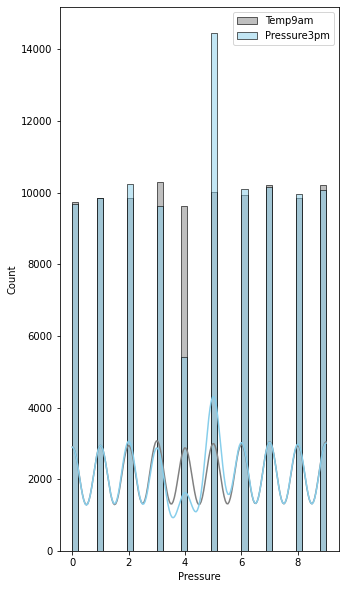

In [37]:
sns.histplot(data=numerica, x="Temp9am", color="gray", label="Temp9am", kde=True)
sns.histplot(data=numerica, x="Pressure3pm", color="skyblue", label="Pressure3pm", kde=True)
#sns.histplot(data=numerica, x="WindGustSpeed", color="red", label="WindGustSpeed", kde=True)
#sns.histplot(data=numerica, x="Temp3pm", color="purple", label="Temp3pm", kde=True)

plt.legend()
plt.xlabel('Pressure') 
plt.show()

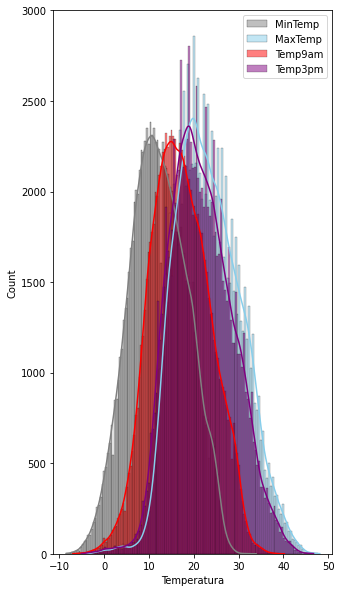

In [38]:
sns.histplot(data=weather, x="MinTemp", color="gray", label="MinTemp", kde=True)
sns.histplot(data=weather, x="MaxTemp", color="skyblue", label="MaxTemp", kde=True)
sns.histplot(data=weather, x="Temp9am", color="red", label="Temp9am", kde=True)
sns.histplot(data=weather, x="Temp3pm", color="purple", label="Temp3pm", kde=True)

plt.legend()
plt.xlabel('Temperatura') 
plt.show()

# PCA

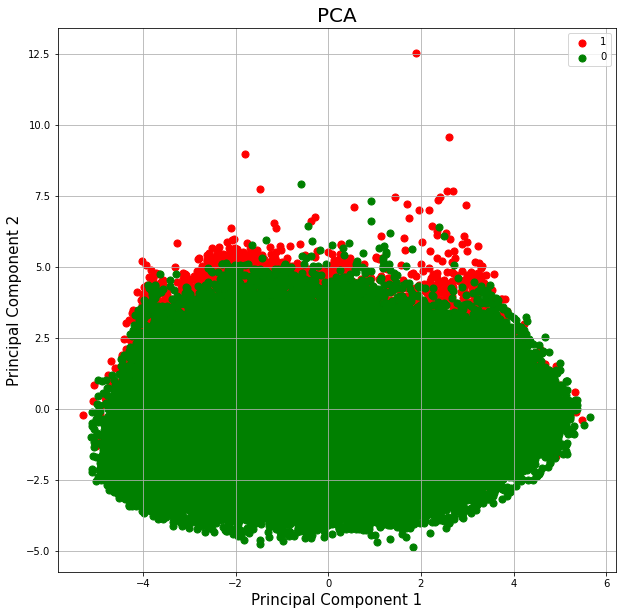

In [39]:
target=categorica.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],axis=1)
categorica2=categorica.drop(['RainTomorrow'],axis=1)
cat2num=pd.get_dummies(categorica2, drop_first=True)

weather2Num=pd.concat([numerica,cat2num],axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Separamos la columna clase o objetivo de todo el conjunto de datos
x = weather2Num.loc[:,weather2Num.columns != 'Target'].values
#y = weather2Num.loc[:,['Target']].values

#Estandarizamos la informacion
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(target)
# Se crea el objeto PCA
pca = PCA(n_components=2)

#Corremos PCA sobre el conjunto de datos X el cual no tiene la clase del df weather.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf

finalDf = pd.concat([principalDf, target], axis = 1)
finalDf.head()
# Graficamos el conjunto de datos

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RainTomorrow'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [40]:

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(weather2Num), columns=weather2Num.columns)
df_scaled.head()
pca = PCA(n_components=.95)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
x = df_pca 
x

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1.036101,2.134271,-1.627225,-0.090562,2.350843,-1.331517,0.270337,0.469267,-0.583557,-2.051074,...,0.095893,-1.339838,0.385769,-1.474756,0.946858,0.489852,0.599532,1.731962,-0.691049,-0.673000
1,0.964714,1.162946,-2.694532,-0.724955,1.272254,-0.560663,-1.639893,-0.417005,-0.087418,-1.865346,...,1.534011,0.920079,-0.696492,0.552619,-0.214187,-0.838840,1.558691,-1.421991,0.524010,0.587959
2,1.919501,0.089949,-2.037005,1.314963,1.347853,-0.831824,-0.437418,-0.748345,-0.474403,-0.389909,...,1.754095,-0.362529,0.142910,-0.085969,0.341289,0.543687,-0.160764,1.252379,-0.523387,0.181429
3,2.470267,2.112110,-1.900989,-0.704447,2.283701,-0.675839,-0.691881,0.746171,-0.381488,-3.422565,...,0.098035,0.105001,0.313293,0.099205,1.775861,-0.202554,0.775584,0.068202,0.548285,0.391338
4,0.820104,-0.456383,-1.106914,-0.183791,2.103297,-1.827558,0.152981,-0.556927,-0.148659,-2.446556,...,0.250685,-0.641728,1.050302,-0.779904,-0.832912,-0.429972,1.027947,0.128058,-0.764973,0.111669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0.070011,-1.551202,0.647437,-2.740450,0.187449,-2.378669,-0.410371,1.604296,1.615281,1.464622,...,0.337918,-0.950448,0.232474,-0.517340,-0.657486,-0.574801,-0.643990,0.358986,0.788773,-0.539304
99512,-0.736607,-2.376370,-0.256790,-2.349849,0.579218,-1.309128,-0.756278,1.031639,0.947791,1.095246,...,0.113145,0.557437,0.085055,0.330207,0.493428,-0.110320,-0.400018,0.333338,-0.114268,-0.850551
99513,-0.079847,-2.948531,-0.073747,-1.714329,0.652784,-1.071657,-0.966893,1.530706,0.701524,1.307404,...,0.505673,1.839673,-0.507834,-0.831329,-0.901762,-0.105892,-0.144819,0.843817,-0.747673,-0.510442
99514,-0.403086,-3.028416,-1.796959,-1.855325,-1.250399,-1.491428,-0.100526,-0.191907,1.446669,0.952848,...,-0.734141,-0.920285,-0.039640,0.428137,1.025830,0.000433,-0.200931,-0.746938,0.466462,-1.226048


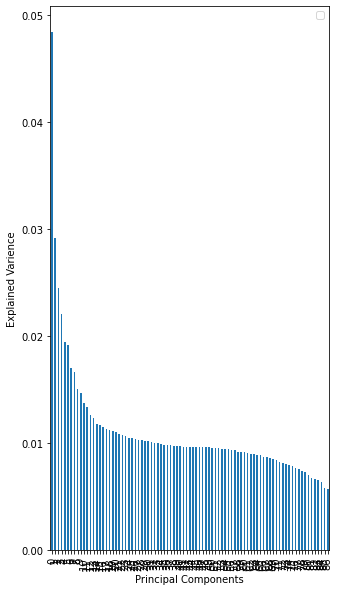

In [41]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

#Visualizacion Rainfall Australia

In [42]:
from IPython.core.display import display, HTML
display(HTML("<div class='tableauPlaceholder' id='viz1652712003286' style='position: relative'><noscript><a href='#'><img alt='RainFall Per Location ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RainFallinLocations&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652712003286');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

In [43]:
#dftotal = pd.concat([numerica_dis, categorica], axis=1).drop(['RainTomorrow'], axis=1)
dftotal =  categorica.merge(numerica_dis, left_index=True, right_index=True)
dftotal = dftotal.drop(['RainTomorrow'], axis=1)

In [44]:
dftotal

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,Albury,W,W,WNW,No,5.0,5.0,0.6,7.0,8.0,7.0,5.0,0.0,0.0,1.0,5.0,5.0
1,Albury,WNW,NNW,WSW,No,2.0,6.0,0.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,5.0,6.0
2,Albury,W,ENE,NW,No,7.0,8.0,1.0,6.0,2.0,6.0,7.0,2.0,1.0,0.0,5.0,8.0
3,Albury,WNW,W,W,No,6.0,8.0,0.2,8.0,7.0,7.0,2.0,1.0,1.0,0.0,7.0,8.0
4,Albury,W,SSE,W,No,2.0,6.0,0.0,4.0,2.0,4.0,1.0,0.0,2.0,2.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,ESE,SE,E,No,2.0,4.0,0.0,6.0,7.0,8.0,2.0,1.0,9.0,9.0,2.0,4.0
99512,Uluru,E,ESE,E,No,0.0,4.0,0.0,2.0,6.0,3.0,2.0,1.0,8.0,8.0,1.0,4.0
99513,Uluru,E,SE,ENE,No,0.0,5.0,0.0,2.0,5.0,2.0,1.0,1.0,8.0,7.0,1.0,5.0
99514,Uluru,NNW,SE,N,No,0.0,6.0,0.0,0.0,5.0,1.0,2.0,0.0,8.0,7.0,1.0,6.0


In [45]:
muestreo_feat_selec = pd.DataFrame(dftotal.sample(n=100, random_state=123, axis=0, ignore_index=True))
muestreo_feat_selec

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,Hobart,S,SW,S,Yes,5.0,1.0,4.8,9.0,3.0,9.0,8.0,9.0,0.0,0.0,3.0,0.0
1,Portland,WSW,SW,SW,No,2.0,1.0,0.8,2.0,6.0,3.0,8.0,9.0,9.0,9.0,2.0,1.0
2,Newcastle,W,N,SE,Yes,3.0,1.0,3.2,5.0,0.0,0.0,9.0,9.0,5.0,5.0,2.0,1.0
3,Sale,ENE,WNW,ENE,No,3.0,6.0,0.0,5.0,4.0,7.0,4.0,6.0,2.0,4.0,5.0,6.0
4,Darwin,NE,ENE,NNW,Yes,9.0,9.0,1.8,6.0,4.0,7.0,5.0,7.0,0.0,0.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Perth,ENE,E,E,No,5.0,7.0,0.0,6.0,6.0,4.0,1.0,1.0,2.0,1.0,6.0,7.0
96,Brisbane,E,E,ENE,No,9.0,7.0,0.0,0.0,3.0,1.0,2.0,7.0,6.0,6.0,9.0,7.0
97,Hobart,NNW,NNW,NW,No,5.0,5.0,0.0,9.0,8.0,7.0,1.0,2.0,1.0,1.0,4.0,4.0
98,CoffsHarbour,E,SW,SE,Yes,5.0,2.0,29.4,7.0,7.0,6.0,8.0,9.0,8.0,7.0,3.0,2.0


## Importancia de atributos

In [46]:
def hamming(v1,v2):
  h=0
  for i in range(v1.size):
    
    if v1[i] == v2[i]:
      h=h+1
  
  return h/v1.size

def entropia(h):
  if h == 0 or h == 1:
    entropia = 0
  else:
    entropia = ( h*np.log10(h)) + ( (1-h)*np.log10(1-h) )
  return entropia

def entropiaTotal(df):
  entroTotal=0
  for i in range(df.shape[0]):
    ent=0
    for j in range(df.shape[0]):
      ham = hamming(df.loc[i], df.loc[j])
      ent = ent + entropia(ham)    
    entroTotal = entroTotal + ent
  
  return -entroTotal/2

def del_col(df):
  e_total = entropiaTotal(df)
  columnas = df.columns.values
  ganancias = []
  for i in columnas:
      ganancia = abs(e_total - entropiaTotal(df.drop(i, axis=1)))
      ganancias.append(ganancia)

  dic_ganancias = {columnas:ganancias for (columnas,ganancias) in zip(columnas,ganancias)}
  dic_ganancias['Entropia_total']= e_total
  col_sel = columnas[ganancias.index(min(ganancias))]
  print('se elimina la columna:'+str(col_sel)+ ' con ganancias: ' + str(dic_ganancias))
  return df.drop(col_sel, axis=1)

def ranking(df):
  new_df = del_col(df)
  i=0
  while i < new_df.shape[1]:
      new_df = del_col(new_df)
      i += 1
  return new_df

In [47]:
ranking(muestreo_feat_selec)

se elimina la columna:WindSpeed3pm con ganancias: {'Location': 22.990759471452748, 'WindGustDir': 13.236564495279254, 'WindDir9am': 11.860776150183483, 'WindDir3pm': 14.097895044629468, 'RainToday': 143.99116085853905, 'MinTemp': 4.834959030505615, 'MaxTemp': 10.521683984623223, 'Rainfall': 56.81068590684515, 'WindGustSpeed': 2.2353975650917164, 'WindSpeed9am': 2.352894601323669, 'WindSpeed3pm': 0.22712095558222245, 'Humidity9am': 5.510329998092061, 'Humidity3pm': 6.7189960813001335, 'Pressure9am': 3.4134117890122297, 'Pressure3pm': 4.408024481219741, 'Temp9am': 8.060400296916896, 'Temp3pm': 10.54500813474499, 'Entropia_total': 780.3815459173052}
se elimina la columna:WindGustSpeed con ganancias: {'Location': 24.100020218431496, 'WindGustDir': 13.76755846047115, 'WindDir9am': 12.511339361517571, 'WindDir3pm': 14.77107358955243, 'RainToday': 152.4214074248482, 'MinTemp': 5.1280302982654575, 'MaxTemp': 11.430670097372285, 'Rainfall': 59.343960130761616, 'WindGustSpeed': 1.597469034529240

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MaxTemp,Rainfall,Temp3pm
0,Hobart,S,SW,S,Yes,1.0,4.8,0.0
1,Portland,WSW,SW,SW,No,1.0,0.8,1.0
2,Newcastle,W,N,SE,Yes,1.0,3.2,1.0
3,Sale,ENE,WNW,ENE,No,6.0,0.0,6.0
4,Darwin,NE,ENE,NNW,Yes,9.0,1.8,9.0
...,...,...,...,...,...,...,...,...
95,Perth,ENE,E,E,No,7.0,0.0,7.0
96,Brisbane,E,E,ENE,No,7.0,0.0,7.0
97,Hobart,NNW,NNW,NW,No,5.0,0.0,4.0
98,CoffsHarbour,E,SW,SE,Yes,2.0,29.4,2.0


In [48]:
def error(x):
    ER = 0
    for e in x:
      err = abs(e-x.mean())
      ER = ER+err
    return ER

i2 = numerica["MinTemp"].sample(n=70, random_state=1)
i2_sort = np.sort(i2)

for i in range(1, i2_sort.size):
    bin1 = i2_sort[0:i]
    bin2 = i2_sort[i:i2_sort.size]
    print('bin1=' + str(bin1) + ' y bin2=' + str(bin2) 
      + ' con ER=' + str(error(bin1)  + error(bin2)))

bin1=[0.] y bin2=[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 7. 7. 7. 7.
 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.] con ER=168.1159420289855
bin1=[0. 0.] y bin2=[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 4.
 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 7. 7. 7. 7. 7.
 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.] con ER=162.70588235294133
bin1=[0. 0. 0.] y bin2=[0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4.
 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7.
 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.] con ER=157.13432835820902
bin1=[0. 0. 0. 0.] y bin2=[0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4.
 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.] con ER=152.

#Asociación

In [49]:
# librerias asociacion y discretizacion
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
!pip install efficient-apriori
from efficient_apriori import apriori
!pip install pyfpgrowth
import pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 26.5 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5505 sha256=8d797b3533f646c9c764318722b1286ba6464660cda62eeb57838fafbaa83bbb
  Stored in directory: /root/.cache/pip/wheels/29/e2/a7/ccb34c35e2c6737d3f09b53784f4323b7ff556a5f02096c70d
Successfully built pyfpgrowth


In [50]:
#discretizacion
cols_conts=["MinTemp","MaxTemp","WindSpeed9am", "WindSpeed3pm", "WindGustSpeed","Humidity9am","Humidity3pm",
          "Pressure9am","Pressure3pm","Temp9am","Temp3pm"]

data_dis = weather2
for var in cols_conts:
  var_dis = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
  data_dis[[var]] = var_dis.fit_transform(data_dis[[var]])
  print(var, var_dis.bin_edges_[0])

MinTemp [-6.9         5.63333333 18.16666667 30.7       ]
MaxTemp [ 1.9 16.1 30.3 44.5]
WindSpeed9am [ 0. 13. 26. 39.]
WindSpeed3pm [ 0.         14.66666667 29.33333333 44.        ]
WindGustSpeed [ 6. 30. 54. 78.]
Humidity9am [ 12.          41.33333333  70.66666667 100.        ]
Humidity3pm [  1.  34.  67. 100.]
Pressure9am [ 997.5        1010.96666667 1024.43333333 1037.9       ]
Pressure3pm [ 995.3        1008.63333333 1021.96666667 1035.3       ]
Temp9am [-2.4 10.5 23.4 36.3]
Temp3pm [ 1.1 14.8 28.5 42.2]


In [51]:
# agragar etiquetas del atributo a los valores 
colnames = data_dis.columns.values

for col in colnames:
  unique = data_dis[col].unique()
  for uni in unique:
    data_dis[col] = data_dis[col].replace({uni:col+'--'+str(uni)})

data_dis_list = data_dis.values.tolist()

In [52]:
# Apriori
confidence = [0.3,0.5]
for n in confidence:
  print('Confianza: '+str(n))
  itemsets, rules = apriori(data_dis_list, min_support=0.2, min_confidence=n)
  for rule in sorted(rules, key=lambda rule: rule.support):
    print(rule)

Se han truncado las últimas 5000 líneas del flujo de salida.
{Pressure3pm--1.0, RainTomorrow--0} -> {MaxTemp--1.0, WindGustSpeed--1.0} (conf: 0.525, supp: 0.293, lift: 1.128, conv: 1.125)
{MaxTemp--1.0, WindGustSpeed--1.0} -> {Pressure3pm--1.0, RainTomorrow--0} (conf: 0.629, supp: 0.293, lift: 1.128, conv: 1.192)
{MaxTemp--1.0, RainTomorrow--0} -> {Pressure3pm--1.0, WindGustSpeed--1.0} (conf: 0.556, supp: 0.293, lift: 1.100, conv: 1.114)
{MaxTemp--1.0, Pressure3pm--1.0} -> {RainTomorrow--0, WindGustSpeed--1.0} (conf: 0.589, supp: 0.293, lift: 1.072, conv: 1.096)
{WindSpeed9am--1.0} -> {MaxTemp--1.0} (conf: 0.659, supp: 0.293, lift: 0.989, conv: 0.978)
{RainToday--No, WindGustSpeed--1.0} -> {Humidity9am--1.0} (conf: 0.538, supp: 0.293, lift: 1.230, conv: 1.217)
{Humidity9am--1.0, WindGustSpeed--1.0} -> {RainToday--No} (conf: 0.900, supp: 0.293, lift: 1.149, conv: 2.159)
{Humidity9am--1.0, RainToday--No} -> {WindGustSpeed--1.0} (conf: 0.752, supp: 0.293, lift: 1.091, conv: 1.254)
{Humidi

In [53]:
# fp-Grow
min_supp = 0.4
patterns = pyfpgrowth.find_frequent_patterns(data_dis_list, round(len(data_dis_list)*min_supp))
Rules=pyfpgrowth.generate_association_rules(patterns=patterns,confidence_threshold=0.5)
Rules

{('RainToday--No',): (('RainTomorrow--0',), 0.8471870147451126),
 ('RainTomorrow--0',): (('RainToday--No',), 0.8479522841695559),
 ('Humidity3pm--1.0', 'MaxTemp--1.0'): (('Temp3pm--1.0',), 0.9692915931073924),
 ('Humidity3pm--1.0', 'Temp3pm--1.0'): (('MaxTemp--1.0',), 0.9383756198546049),
 ('MaxTemp--1.0', 'Temp3pm--1.0'): (('Temp9am--1.0',), 0.8515869905956113),
 ('Humidity3pm--1.0', 'RainToday--No'): (('RainTomorrow--0',),
  0.8767581899069788),
 ('Humidity3pm--1.0', 'RainTomorrow--0'): (('RainToday--No',),
  0.8364092341328532),
 ('RainToday--No', 'RainTomorrow--0'): (('Pressure9am--1.0',),
  0.7234345871257813),
 ('MinTemp--1.0', 'Rainfall--0.0'): (('RainToday--No',), 1.0),
 ('RainToday--No', 'Rainfall--0.0'): (('RainTomorrow--0',),
  0.8734860216806586),
 ('Rainfall--0.0', 'Temp9am--1.0'): (('RainToday--No',), 1.0),
 ('MaxTemp--1.0', 'Rainfall--0.0'): (('RainToday--No', 'Temp3pm--1.0'),
  0.9579699992753448),
 ('Rainfall--0.0', 'Temp3pm--1.0'): (('RainToday--No',), 1.0),
 ('RainTo

#Clustering

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/dataset/Weather%20Training%20Data.csv')
data = data.drop(['row ID','Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],axis=1)
data = data.dropna()
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,8.0,20.7,0.0,ESE,41.0,SE,E,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,No,0
99512,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0
99513,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0
99514,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0


In [55]:
#Librerias clustering
!pip install gower
import gower
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# Normlaización para usar distancia euclidiana y convertir datos categoricos a continuos
cols_conts = ["MinTemp","MaxTemp","Rainfall","WindSpeed9am", "WindSpeed3pm", "WindGustSpeed","Humidity9am","Humidity3pm",
          "Pressure9am","Pressure3pm","Temp9am","Temp3pm"]
cols_cats = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

data_normalize = preprocessing.normalize(data[cols_conts])
data_normalize = pd.DataFrame(data_normalize, columns=cols_conts, index=data.index)
data_normalize = pd.concat([data_normalize, data[cols_cats]], axis=1)

data_normalize['RainToday'] = data_normalize['RainToday'].replace({'Yes':1, 'No':0})

location_encoded=pd.get_dummies(data_normalize['Location'])
data_normalize=data_normalize.join(location_encoded)
data_normalize.drop('Location',axis=1,inplace=True)

unique = data_normalize['WindGustDir'].unique()
for uni in unique:
  data_normalize['WindGustDir'] = data_normalize['WindGustDir'].replace({uni:'WindGustDir-'+str(uni)})
  data_normalize['WindDir9am'] = data_normalize['WindDir9am'].replace({uni:'WindDir9am-'+str(uni)})
  data_normalize['WindDir3pm'] = data_normalize['WindDir3pm'].replace({uni:'WindDir3pm-'+str(uni)})

WindGustDir_encoded=pd.get_dummies(data_normalize['WindGustDir'])
data_normalize=data_normalize.join(WindGustDir_encoded)
data_normalize.drop('WindGustDir',axis=1,inplace=True)

WindDir9am_encoded=pd.get_dummies(data_normalize['WindDir9am'])
data_normalize=data_normalize.join(WindDir9am_encoded)
data_normalize.drop('WindDir9am',axis=1,inplace=True)

WindDir3pm_encoded=pd.get_dummies(data_normalize['WindDir3pm'])
data_normalize=data_normalize.join(WindDir3pm_encoded)
data_normalize.drop('WindDir3pm',axis=1,inplace=True)

data_normalize

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm-NNW,WindDir3pm-NW,WindDir3pm-S,WindDir3pm-SE,WindDir3pm-SSE,WindDir3pm-SSW,WindDir3pm-SW,WindDir3pm-W,WindDir3pm-WNW,WindDir3pm-WSW
0,0.009383,0.016035,0.000420,0.014004,0.016805,0.030809,0.049715,0.015405,0.705598,0.705178,...,0,0,0,0,0,0,0,0,1,0
1,0.005177,0.017558,0.000000,0.002798,0.015390,0.030779,0.030779,0.017488,0.706948,0.704989,...,0,0,0,0,0,0,0,0,0,1
2,0.012234,0.022580,0.000699,0.004893,0.013981,0.028662,0.057324,0.023069,0.706621,0.703265,...,0,1,0,0,0,0,0,0,0,0
3,0.010224,0.020798,0.000140,0.013305,0.016806,0.039215,0.038514,0.016106,0.706703,0.704042,...,0,0,0,0,0,0,0,1,0,0
4,0.005374,0.018634,0.000000,0.004187,0.011864,0.024426,0.033499,0.013260,0.707240,0.704937,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0.005502,0.014237,0.000000,0.013067,0.017882,0.028198,0.038515,0.022008,0.707089,0.704476,...,0,0,0,0,0,0,0,0,0,0
99512,0.002416,0.015045,0.000000,0.010352,0.008972,0.021395,0.040719,0.018634,0.707205,0.704789,...,0,0,0,0,0,0,0,0,0,0
99513,0.001934,0.016161,0.000000,0.008979,0.007597,0.021410,0.035224,0.016576,0.707647,0.704677,...,0,0,0,0,0,0,0,0,0,0
99514,0.002489,0.017493,0.000000,0.008988,0.006223,0.015211,0.038719,0.014520,0.707665,0.704623,...,0,0,0,0,0,0,0,0,0,0


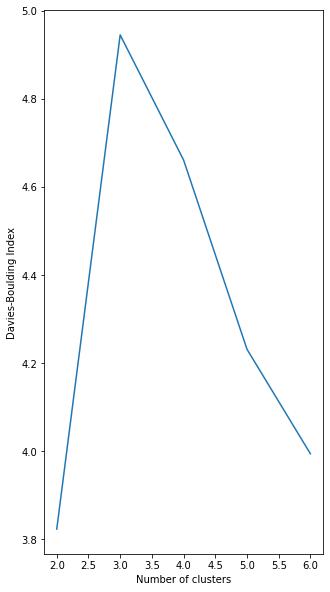

In [57]:
#  agrupacion por kmeans y validacion por Davies_Bouldin
results = {}
for i in [2, 3, 4, 5, 6]:
    kmeans = cluster.KMeans(n_clusters=i, max_iter=50, random_state=1)
    labels = kmeans.fit_predict(data_normalize)
    db_index = metrics.davies_bouldin_score(data_normalize, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [58]:
# agrupacion por vecinos mas cercanos y validacion externa: precision, recall  y f1

X = data_normalize
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)
pred5 = knn5.predict(X_test)

knn6 = KNeighborsClassifier(n_neighbors = 6)
knn6.fit(X_train,y_train)
pred6 = knn6.predict(X_test)

knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train,y_train)
pred7 = knn7.predict(X_test)

knn8 = KNeighborsClassifier(n_neighbors = 8)
knn8.fit(X_train,y_train)
pred8 = knn8.predict(X_test)


/usr/local/lib/python3.8/dist-packages/scipy/cluster/hierarchy.py:446: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


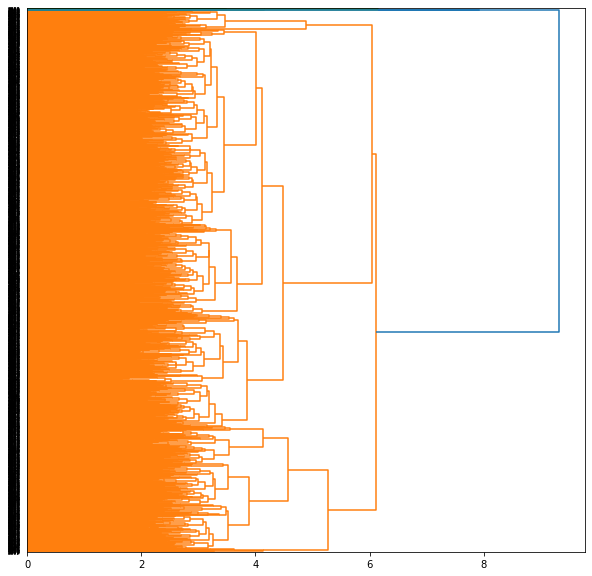

In [59]:
# Jerarquico average con una matriz de distancia Gower
# normalizacion para usar distancia, se dejan los categoricos para usar distancia de Gower y se muestrea ya que no es sufuciente la ram.
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

cols_conts = ["MinTemp","MaxTemp","Rainfall","WindSpeed9am", "WindSpeed3pm", "WindGustSpeed","Humidity9am","Humidity3pm",
          "Pressure9am","Pressure3pm","Temp9am","Temp3pm"]
cols_cats = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

data_normalize = preprocessing.normalize(data[cols_conts])
data_normalize = pd.DataFrame(data_normalize, columns=cols_conts, index=data.index)
data_normalize = pd.concat([data_normalize, data[cols_cats]], axis=1)

sample_data_normalize = pd.concat([data_normalize, data['RainTomorrow']], axis=1).groupby('RainTomorrow').apply(lambda x: x.sample(frac=0.05))
sample_data_normalize = sample_data_normalize.drop(['RainTomorrow'], axis=1)

xx = np.asarray(sample_data_normalize)
matrix_gower = gower.gower_matrix(xx)

%matplotlib inline
fig = plt.figure(figsize = (10,10))
Z = hierarchy.average(matrix_gower)
dn = hierarchy.dendrogram(Z,orientation='right')

#Clasificacion

In [60]:
weather2_norm['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather2_norm['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
weather2_norm = weather2_norm.drop(['Location'],axis=1)

In [61]:
# Categorical variables WindGustDir, WindDir3pm and WindDir9am in dummy variables for each category.
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(weather2_norm, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(96225, 62)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.191909,-0.044818,-0.207556,0.306356,0.676623,0.613458,0.112554,-1.434767,-1.478558,-1.223339,...,0,0,0,0,0,0,0,1,0,0
1,-0.749025,0.264743,-0.278596,0.306356,-1.129164,0.384108,-1.311766,-1.288528,-1.049117,-1.118732,...,1,0,0,0,0,0,0,0,0,0
2,0.834881,1.277851,-0.160197,0.077905,-0.790579,0.154758,0.692833,-0.898557,-1.019500,-1.387722,...,0,0,0,0,0,0,0,0,0,0
3,0.380096,0.912006,-0.254916,1.220162,0.563761,0.613458,-0.731487,-1.386021,-1.256433,-1.477386,...,0,0,0,0,0,0,0,1,0,0
4,-0.701979,0.489878,-0.278596,-0.378998,-0.903441,-0.189267,-1.100755,-1.581006,-0.634483,-0.775022,...,0,0,0,0,1,0,0,0,0,0


In [62]:
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.539894,0.492958,0.001617,0.527778,0.512821,0.545455,0.670455,0.212121,0.252475,0.2950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.380319,0.544601,0.000000,0.527778,0.102564,0.500000,0.363636,0.242424,0.324257,0.3125,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.648936,0.713615,0.002695,0.486111,0.179487,0.454545,0.795455,0.323232,0.329208,0.2675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.571809,0.652582,0.000539,0.694444,0.487179,0.545455,0.488636,0.222222,0.289604,0.2525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.388298,0.582160,0.000000,0.402778,0.153846,0.386364,0.409091,0.181818,0.393564,0.3700,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Calculate the correlation matrix
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

Var correlation < 0.5%                  RainTomorrow
WindGustDir_NNE      0.004772
WindGustDir_S        0.000557
WindGustDir_SSW      0.001834
WindGustDir_WSW      0.002694
WindDir3pm_SE        0.004398
WindDir3pm_SSW       0.000560
WindDir3pm_WSW       0.002807
WindDir9am_NE        0.004114
WindDir9am_SSW       0.001407
WindDir9am_SW        0.004144


In [64]:
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Data Final (96225, 52)


In [65]:
from sklearn.model_selection import train_test_split
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [66]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (76980, 51)
Y train shape:  (76980,)
X test shape:  (19245, 51)
Y test shape:  (19245,)


## LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


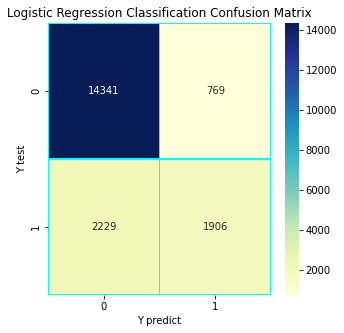

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [69]:
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.8442192777344765


## Gaussian Naive Bayes Classification

In [70]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

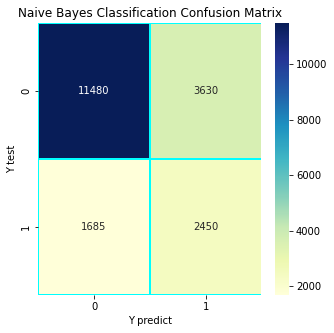

In [71]:
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [72]:
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.723824369966225


## DecisionTree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

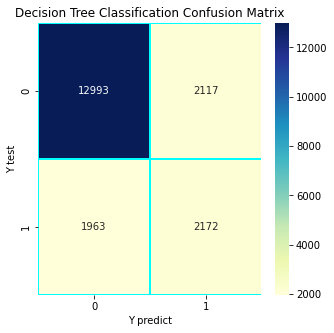

In [74]:
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [75]:
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.7879968823070927


## RandomForest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

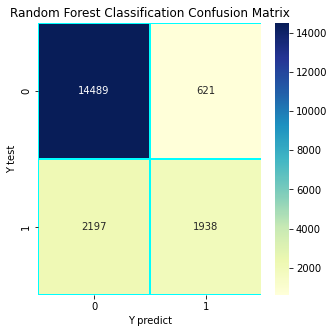

In [77]:
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [78]:
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.8535723564562224


## KNeighbors Classsifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

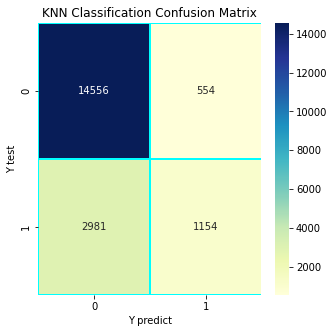

In [80]:
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [81]:
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8163159262146011


## Comparacion modelos

In [82]:
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score    0.844219
Naive Bayes Score            0.723824
Decision Tree Score          0.787997
Random Forest Score          0.853572
K-Nearest Neighbour Score    0.816316
dtype: float64


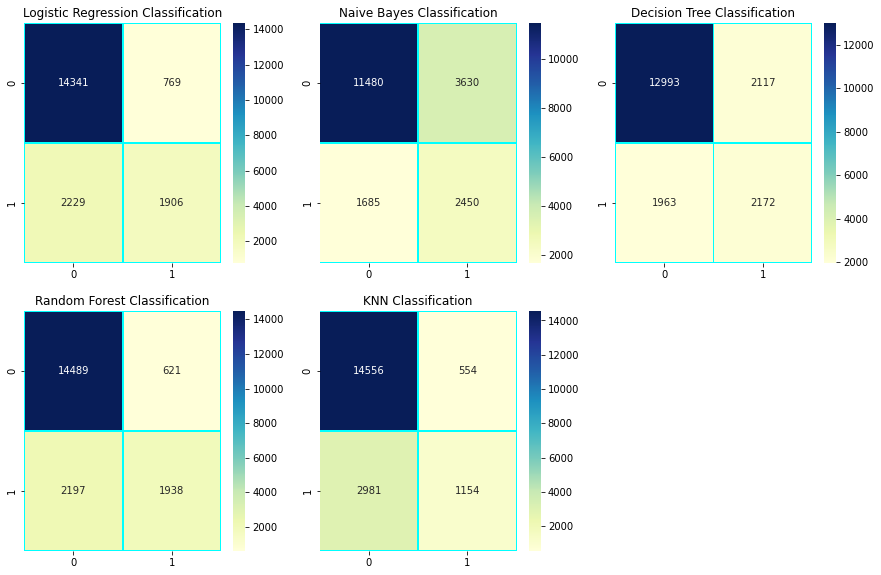

In [83]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('Naive Bayes Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Random Forest Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()

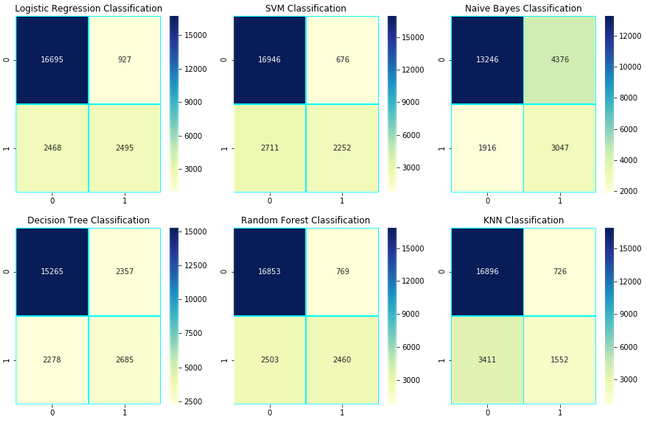

### ROC Curve

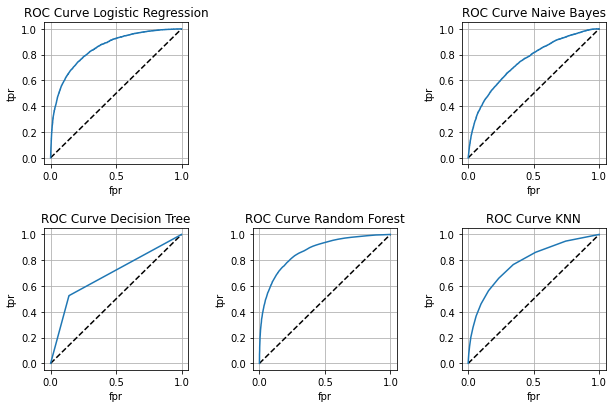

In [84]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()


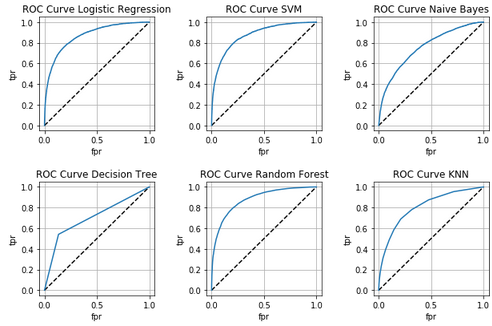